# Imports

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Monte Carlo

In [2]:
def monte_carlo_control_eps_soft(env, num_episodes, gamma, eps, alpha):
    num_actions = env.action_space.n
    num_states = env.observation_space.n
    Q = np.zeros((num_states, num_actions))
    policy = np.ones((num_states, num_actions)) / num_actions

    returns = {}
    state_action_counts = {}

    for episode in range(num_episodes):
        episode_data = []

        state = env.reset()
        done = False

        while not done:
            if np.random.uniform(0, 1) < eps:
                action = np.random.randint(num_actions)
            else:
                action = np.argmax(Q[state])

            next_state, reward, done, _ = env.step(action)
            episode_data.append((state, action, reward))

            state = next_state

        G = 0
        for t in range(len(episode_data) - 1, -1, -1):
            state, action, reward = episode_data[t]
            G = gamma*G + reward

            if (state, action) not in state_action_counts:
                state_action_counts[(state, action)] = 1
            else:
                state_action_counts[(state, action)] += 1

            if (state, action) not in returns:
                returns[(state, action)] = G
            else:
                returns[(state, action)] += G

            Q[state, action] = returns[(state, action)] / state_action_counts[(state, action)]
            policy[state] = np.eye(num_actions)[np.argmax(Q[state])]

    return Q, policy

# Creating Environment

In [3]:
custom_map = [
    'SFFH',
    'FFFF',
    'HFFF',
    'HFFG'
]
 
env = gym.make('FrozenLake-v0', desc=custom_map, is_slippery=True)

Q, policy = monte_carlo_control_eps_soft(env, num_episodes=100000, gamma=0.3, eps=0.2, alpha=0.05)

# Q Table Plot
### Blue -> Start State | Red -> End State | Green -> Goal State

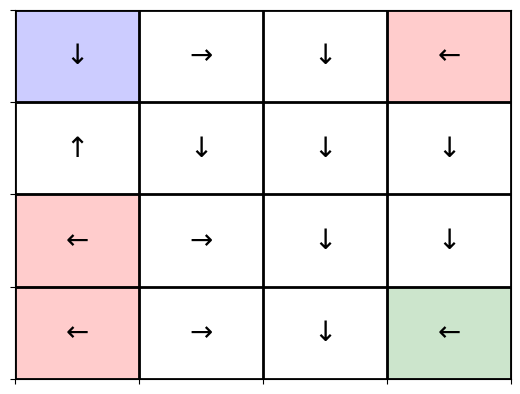

In [4]:
prob_grid = np.reshape(Q, (4, 4, 4))

arrows = ['←', '↓', '→', '↑']

fig, ax = plt.subplots()
ax.set_xticks(np.arange(-0.5, 4.5, 1))
ax.set_yticks(np.arange(-0.5, 4.5, 1))
ax.grid(which='both', color='black', linestyle='-', linewidth=2)
ax.set_xticklabels([])
ax.set_yticklabels([])
for i in range(4):
    for j in range(4):
        optimal_action = np.argmax(prob_grid[i, j])
        ax.text(j, 3 - i, arrows[optimal_action], ha='center', va='center', fontsize=20)

rects = [plt.Rectangle((-0.5, 2.5), 1, 1, fc='blue', ec='black', lw=2, alpha=0.2),
         plt.Rectangle((-0.5, -0.5), 1, 1, fc='red', ec='black', lw=2, alpha=0.2), 
         plt.Rectangle((-0.5, 0.5), 1, 1, fc='red', ec='black', lw=2, alpha=0.2), 
         plt.Rectangle((2.5, 2.5), 1, 1, fc='red', ec='black', lw=2, alpha=0.2),
         plt.Rectangle((2.5, -0.5), 1, 1, fc='green', ec='black', lw=2, alpha=0.2)]

for rect in rects:
    ax.add_patch(rect)
    
plt.show()